In [27]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline
from datetime import datetime, timedelta

file = "D:/astro/domecam/together.xlsx"
df = pd.read_excel(file)
save_dir = 'D:/astro/phys_and_output/'

seeing_label = "$β_\mathrm{dome}$, ''"
var_label = "$σ_{V}$, m/s"
delta_T_out_in = "∆T(out-in), °"
wind_speed_label = "$V_\mathrm{wind}$, m/s"
delta_T_in_mir = "∆T(in-mir), °"

font_size = 18 # размер шрифтов
alpha_value = 0.8 # прозрачность точек на графике

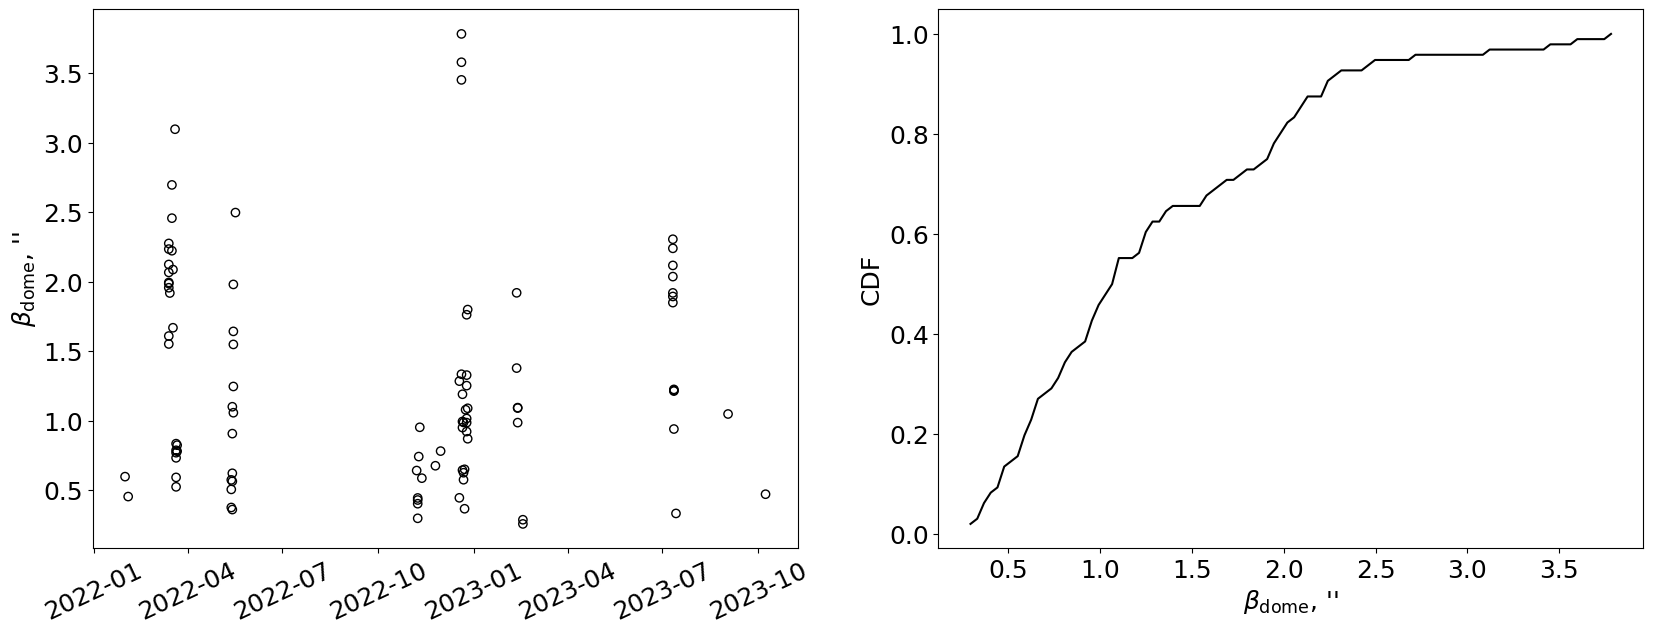

In [28]:
count, bins_count = np.histogram(df['seeing'], bins=len(df['seeing']))
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 

fig, (ax2, ax) = plt.subplots(1, 2, figsize=(20, 7))

ax.plot(bins_count[1:], cdf, color='black') 
ax.set_xlabel(seeing_label, size=18)
ax.set_ylabel("CDF", size=18)
ax.tick_params(labelsize=18)

file_date = []
file_date_month_only = []
for item in df['file']:
    file_time = datetime.strptime(item.replace('DC', '').replace('_2km.fits',''), '%y%m%d%H%M%S')
    file_date.append(f'{file_time.day} {file_time.strftime("%b")} {file_time.year}')
    file_date_month_only.append(f'{file_time.strftime("%b")} {file_time.year}')

df2 = df.assign(file_date=file_date)
df2 = df2.assign(month_only=file_date_month_only)

df2['file_date'] = pd.to_datetime(df2['file_date'], format='%d %b %Y')


ax2.scatter(df2['file_date'], df2["seeing"], edgecolor='black', color="None", alpha=1)
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,12,3))) # шаг по месяцам
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # формат отображения даты 
ax2.set_ylabel(seeing_label, size=font_size)
ax2.tick_params(axis='x', labelsize=18, rotation = 25)
ax2.tick_params(axis='y', labelsize=18)
# ax2 = plt.gca()
# plt.setp(ax2.get_xticklabels(), rotation=90, size=font_size) 
fig.savefig(f'{save_dir}seeings.png', bbox_inches='tight')

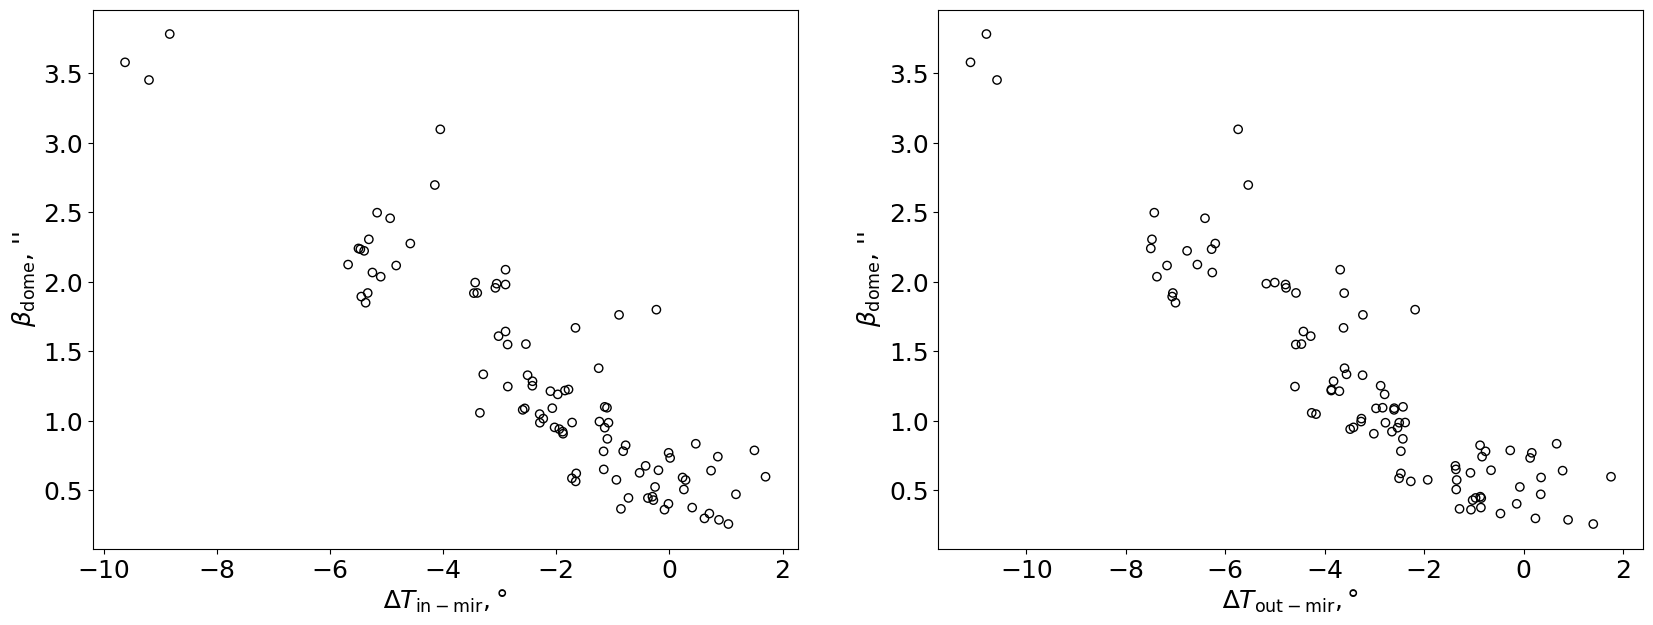

In [29]:
mirror_temperature = (df['ts_1'] + df['ts_2'] + df['ts_3'])/3
# indoor_temperuature = (df['ts_15'] + df['ts_17'] + df['ts_19'])/3
indoor_temperuature = (df['ts_17'] + df['ts_19'])/2
outdoor_temperuature = df['temperature']

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# ax.errorbar(indoor_temperuature - mirror_temperature, df['seeing'], yerr=seeing_err, color="None", fmt="o", ecolor='black')
ax.scatter(indoor_temperuature - mirror_temperature, df['seeing'], edgecolor='black', color="None", alpha=1)
ax.set_ylabel(seeing_label, size=font_size)
ax.set_xlabel("$∆T_\mathrm{in-mir}, °$", size=font_size)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

# xx = [-7.8, -2.5, 0, 5, 7.5, 12.5]
# yy = [1.2, 0.5, 0.25, 0.15, 0.4, 1.5]
# xnew = np.linspace(np.min(xx), np.max(xx), 200) 
# spl = make_interp_spline(xx, yy, k=3)
# y_smooth = spl(xnew)
# ax.plot(xnew, y_smooth, color='red', ls='--', alpha=0.6)

# ax2.errorbar(outdoor_temperuature - mirror_temperature, df['seeing'], yerr=seeing_err, color="None", fmt="o", ecolor='black')
ax2.scatter(outdoor_temperuature - mirror_temperature, df['seeing'], edgecolor='black', color="None", alpha=1)
ax2.set_ylabel(seeing_label, size=font_size)
# ax2.set_yticks(np.linspace(0, 4, 8))
# ax2.set_yticklabels([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4], size=18)
ax2.set_xlabel("$∆T_\mathrm{out-mir}, °$", size=font_size)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)

fig.savefig(f'{save_dir}seeing.png', bbox_inches='tight')

In [9]:
# with open('D:/astro/jopa.txt', 'w') as f:
#     print(indoor_temperuature.to_string(index=False), file=f)
df2 = pd.read_excel("D:/astro/domecam/lol.xlsx")

datesss = []
for line in df2['file']:
    datesss.append(datetime.strptime(line[2:-9], "%y%m%d%H%M%S"))

df2.insert(1, 'dates', datesss)
df2['az'] = df2['az'].astype(int)
df2['alt'] = df2['alt'].astype(int)
df2 = df2.round({'var, m/s': 2})
df2 = df2.round({'seeing': 2})
df2 = df2.round({'mirror': 2})

for i in range(len(df2)):
    if i == 40:
        print()
    print(df2.loc[i, "dates"], '&', (df2.loc[i, "star"]).replace('_', ' '), '&', df2.loc[i, "alt"], '&', df2.loc[i, "az"], '&', df2.loc[i, "var, m/s"], '&', df2.loc[i, "seeing"], '&', df2.loc[i, "wind speed"], '&', df2.loc[i, "mirror"], '&', df2.loc[i, "indoor temp"], '&', df2.loc[i, "temperature"], '\\')

2022-11-08 01:43:07 & Bet Gem & 74 & 176 & 0.33 & 0.4 & 1.86 & 1.87 & 1.85 & 1.73 \
2022-12-21 22:16:49 & Bet Tau & 64 & 241 & 0.07 & 1.19 & 0.29 & -1.21 & -3.18 & -4.0 \
2022-03-14 21:16:42 & Eta UMa & 66 & 64 & 0.19 & 1.99 & 0.0 & -7.17 & -10.6 & -12.17 \
2023-02-12 02:34:33 & Eps UMa & 67 & 313 & 0.08 & 0.99 & 2.42 & -7.3 & -9.59 & -9.8 \
2023-07-12 22:31:25 & Alp Aql & 53 & 202 & 0.3 & 0.94 & 0.27 & 10.65 & 8.7 & 7.16 \
2022-12-18 22:56:30 & Alp Aur & 65 & 287 & 0.15 & 1.28 & 0.86 & 4.54 & 2.12 & 0.72 \
2023-02-11 00:01:28 & Gam UMa & 79 & 343 & 0.27 & 1.92 & 2.41 & -5.39 & -8.79 & -9.97 \
2022-05-14 18:02:15 & Bet Leo & 59 & 195 & 0.41 & 1.1 & 1.47 & 8.91 & 7.77 & 6.49 \
2022-12-20 14:55:16 & Alp Peg & 60 & 198 & 0.81 & 3.58 & 7.27 & 2.43 & -7.19 & -8.69 \
2022-03-21 21:17:31 & Eta UMa & 71 & 63 & 0.27 & 0.79 & 1.08 & -9.23 & -7.73 & -9.5 \
2022-03-17 00:43:45 & Eta UMa & 74 & 298 & 0.27 & 2.22 & 0.15 & -9.03 & -14.43 & -15.8 \
2022-05-15 17:52:29 & Eps UMa & 76 & 23 & 0.25 & 1.64

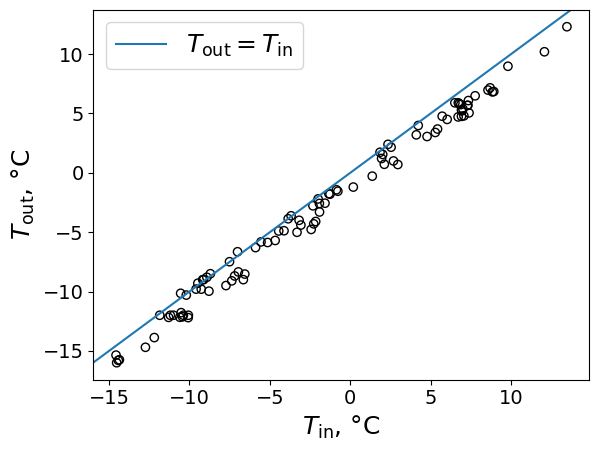

In [31]:
plt.figure()
plt.scatter(indoor_temperuature, outdoor_temperuature, edgecolor='black', color="None", alpha=1)
plt.xlabel("$T_\mathrm{in}$, °C", size=18)
plt.ylabel("$T_\mathrm{out}$, °C", size=18)
plt.axline((0, 0), (1, 1), label='$T_\mathrm{out} = T_\mathrm{in}$')
plt.legend(fontsize=18)
plt.tick_params(labelsize=14)
plt.savefig(f'{save_dir}temperatures.png', bbox_inches='tight')

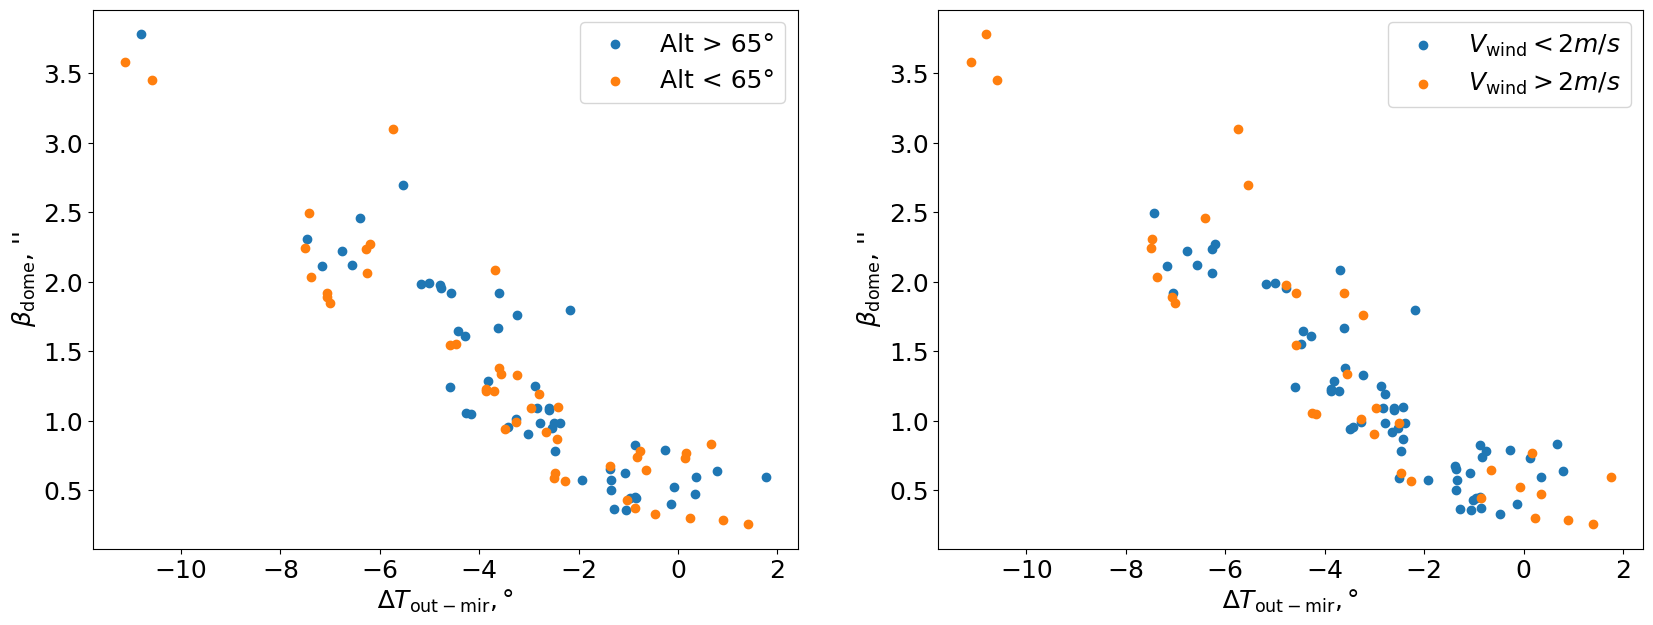

In [9]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20, 7))

df_alt_m65 = df.loc[df['alt'] < 65]
df_alt_b65 = df.loc[df['alt'] > 65]
mirror_temperature_m65 = (df_alt_m65['ts_1'] + df_alt_m65['ts_2'] + df_alt_m65['ts_3'])/3
mirror_temperature_b65 = (df_alt_b65['ts_1'] + df_alt_b65['ts_2'] + df_alt_b65['ts_3'])/3

ax.scatter(df_alt_b65['temperature']-mirror_temperature_b65, df_alt_b65['seeing'], label='Alt > 65°')
ax.scatter(df_alt_m65['temperature']-mirror_temperature_m65, df_alt_m65['seeing'], label='Alt < 65°')
ax.set_ylabel("$β_\mathrm{dome}$, ''", size=font_size)
ax.set_xlabel("$∆T_\mathrm{out-mir}, °$", size=font_size)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.legend(fontsize=18)


df_wind_m2 = df.loc[df['wind speed'] < 2]
df_wind_b2 = df.loc[df['wind speed'] > 2]
mirror_temperature_m2 = (df_wind_m2['ts_1'] + df_wind_m2['ts_2'] + df_wind_m2['ts_3'])/3
mirror_temperature_b2 = (df_wind_b2['ts_1'] + df_wind_b2['ts_2'] + df_wind_b2['ts_3'])/3

ax2.scatter(df_wind_m2['temperature']-mirror_temperature_m2, df_wind_m2['seeing'], label='$V_\mathrm{wind} < 2 m/s$')
ax2.scatter(df_wind_b2['temperature']-mirror_temperature_b2, df_wind_b2['seeing'], label='$V_\mathrm{wind} > 2 m/s$')
ax2.set_ylabel("$β_\mathrm{dome}$, ''", size=font_size)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel("$∆T_\mathrm{out-mir}, °$", size=font_size)
ax2.legend(fontsize=18)

fig.savefig(f'{save_dir}seeing_alt_wind.png', bbox_inches='tight')

In [49]:
print(f"percentile 20, 80: {np.percentile(df['seeing'], [20, 80])}")
print(f"min: {np.min(df['seeing'])}, max: {np.max(df['seeing'])}")
print(f"median: {np.median(df['seeing'])}, mean: {np.mean(df['seeing'])}")

print(df['seeing'].sort_values())
print('Внутри-Главное зеркало ∆T (градусы)', (indoor_temperuature - mirror_temperature)[37])
print('Снаружи-Внутри ∆T (градусы):', (outdoor_temperuature - indoor_temperuature)[37])

percentile 20, 80: [0.5915 1.9796]
min: 0.2568, max: 3.7816
median: 1.06735, mean: 1.2760416666666667
37    0.2568
71    0.2869
15    0.2972
32    0.3322
45    0.3600
       ...  
35    2.6954
79    3.0960
57    3.4509
8     3.5779
33    3.7816
Name: seeing, Length: 96, dtype: float64
Внутри-Главное зеркало ∆T (градусы) 1.0433333333333348
Снаружи-Внутри ∆T (градусы): 0.35999999999999766


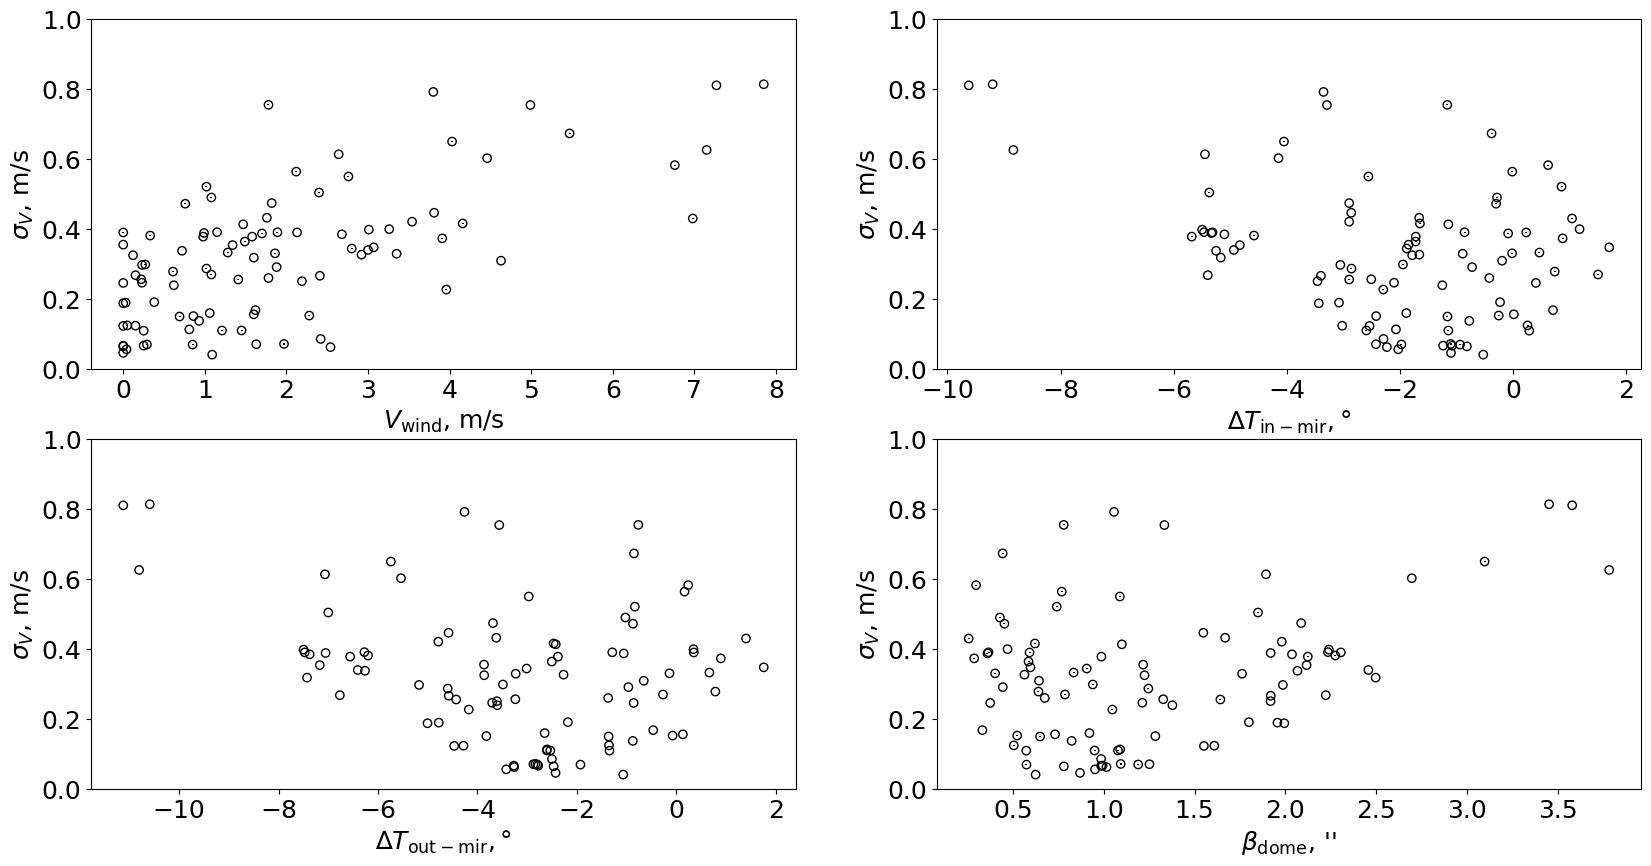

In [16]:
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

var_lim = 1

ax.errorbar(df['wind speed'], df['var, m/s'], yerr=df['var error, m/s'], color="None", fmt="o", ecolor='black')
ax.scatter(df['wind speed'], df['var, m/s'], edgecolor='black', color="None", alpha=1)
ax.set_ylabel(var_label, size=font_size)
ax.set_xlabel(wind_speed_label, size=font_size)
ax.set_ylim(0, var_lim)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

ax2.errorbar(indoor_temperuature - mirror_temperature, df['var, m/s'], yerr=df['var error, m/s'], color="None", fmt="o", ecolor='black')
ax2.scatter(indoor_temperuature - mirror_temperature, df['var, m/s'], edgecolor='black', color="None", alpha=1)
ax2.set_ylabel(var_label, size=font_size)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel("$∆T_\mathrm{in-mir}, °$", size=font_size)
ax2.set_ylim(0, var_lim)

# ax3.errorbar(outdoor_temperuature - indoor_temperuature, df['var, m/s'], yerr=df['var error, m/s'], color="None", fmt="o", ecolor='black')
# ax3.scatter(outdoor_temperuature - indoor_temperuature, df['var, m/s'], edgecolor='black', color="None", alpha=1)
ax3.scatter(outdoor_temperuature - mirror_temperature, df['var, m/s'], edgecolor='black', color="None", alpha=1)
ax3.set_ylabel(var_label, size=font_size)
ax3.set_xlabel("$∆T_\mathrm{out-mir}, °$", size=font_size)
ax3.xaxis.set_tick_params(labelsize=18)
ax3.yaxis.set_tick_params(labelsize=18)
ax3.set_ylim(0, var_lim)

ax4.errorbar(df['seeing'], df['var, m/s'], yerr=df['var error, m/s'], color="None", fmt="o", ecolor='black')
ax4.scatter(df['seeing'], df['var, m/s'], edgecolor='black', color="None", alpha=1)
ax4.set_ylabel(var_label, size=font_size)
ax4.set_xlabel(seeing_label, size=font_size)
ax4.set_ylim(0, var_lim)
ax4.xaxis.set_tick_params(labelsize=18)
ax4.yaxis.set_tick_params(labelsize=18)

fig.savefig(f'{save_dir}variance.png', bbox_inches='tight')

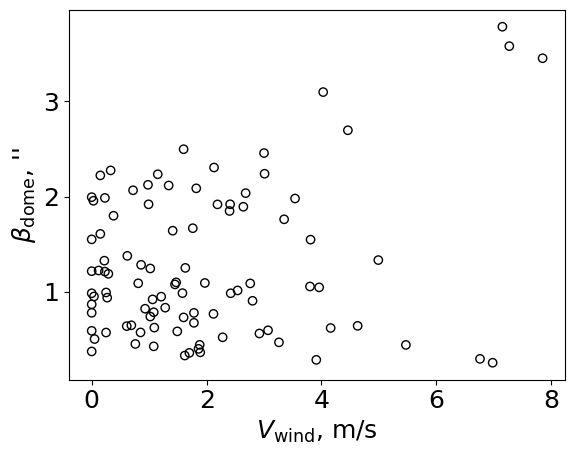

In [100]:
plt.figure()

plt.scatter(df['wind speed'], df['seeing'], edgecolor='black', color="None", alpha=1)
plt.errorbar(df['wind speed'], df['seeing'], yerr=pow(df['Cn2 error'], 3/5), color="None", fmt="o", ecolor='black')
plt.ylabel(seeing_label, size=font_size)
plt.xlabel(wind_speed_label, size=font_size)
plt.tick_params(labelsize=18)
plt.tick_params(labelsize=18)

plt.savefig(f'{save_dir}seeing_windspeed.png', bbox_inches='tight')

C:\Users\miron\AppData\Local\Temp\ipykernel_8312\3154240647.py:8: RuntimeWarning: divide by zero encountered in power
  r0_atm = pow(0.423 * pow((2*np.pi/lambda_), 2) * (Cn2_atm), -3.0/5.0)
C:\Users\miron\AppData\Local\Temp\ipykernel_8312\3154240647.py:11: RuntimeWarning: divide by zero encountered in scalar power
  r0_dome = pow(0.423 * pow((2*np.pi/lambda_), 2) * (Cn2_dome[i]), -3.0/5.0)
C:\Users\miron\AppData\Local\Temp\ipykernel_8312\3154240647.py:13: RuntimeWarning: divide by zero encountered in power
  r0_dot = pow(0.423 * pow((2*np.pi/lambda_), 2) * (Cn2_dome[i]+Cn2_atm), -3.0/5.0)


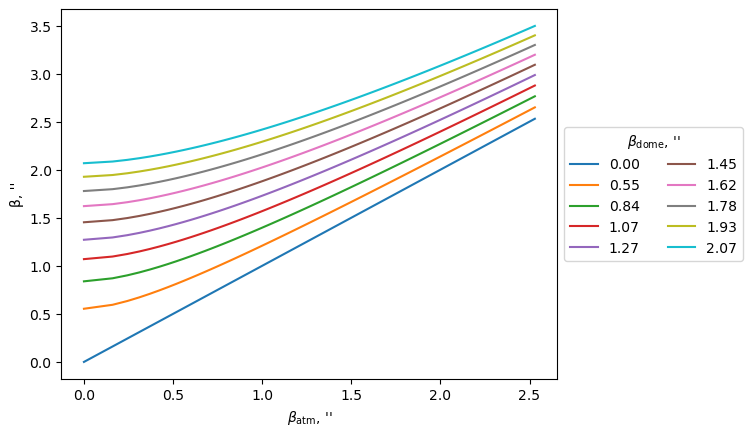

In [24]:
lambda_ = 650 * 1e-9

Cn2_dome = np.linspace(0, 2.5 * 1e-12, 10)
Cn2_atm = np.linspace(0, 3.5 * 1e-12, 100)

plt.figure()
for i in range(len(Cn2_dome)):
    r0_atm = pow(0.423 * pow((2*np.pi/lambda_), 2) * (Cn2_atm), -3.0/5.0)
    seeing_atm = 206265 * 0.98 * lambda_/r0_atm
    
    r0_dome = pow(0.423 * pow((2*np.pi/lambda_), 2) * (Cn2_dome[i]), -3.0/5.0)
    seeing_dome = 206265 * 0.98 * lambda_/r0_dome
    r0_dot = pow(0.423 * pow((2*np.pi/lambda_), 2) * (Cn2_dome[i]+Cn2_atm), -3.0/5.0)
    seeing_dot = 206265 * 0.98 * lambda_/r0_dot
    
    plt.plot(seeing_atm, seeing_dot, label=f'{seeing_dome:.2f}')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, title="$β_\mathrm{dome}$, ''")
plt.ylabel("β, ''")
plt.xlabel("$β_\mathrm{atm}$, ''")

plt.savefig(f'{save_dir}seeing_dome_atm.png', bbox_inches='tight')

In [60]:
import os
from datetime import datetime

log_dir = 'D:/astro/domecam/dcslogs/opt/tcs25m/var/log/dcs'

metka = 0
with open('D:/astro/loggggs.txt', 'w') as f_main:
    print('open|close', file=f_main)
    for file in os.listdir(log_dir):
        with open(f'{log_dir}/{file}') as f:
            for line in f:
                if ('DOME:CMD_OPEN : 1' in line) and (metka == 0):
                    open_ = datetime.strptime(line[8:27], "%Y/%m/%d %H:%M:%S")
                    metka = 1
                if ('DOME:CMD_CLOSE : 1' in line) and (metka == 1):
                    close_ = datetime.strptime(line[8:27], "%Y/%m/%d %H:%M:%S")
                    print(f'{open_}|{close_}', file=f_main)
                    metka = 0

In [139]:
import pandas as pd
from datetime import timedelta


df = pd.read_csv('D:/astro/loggggs.txt', sep="|")
df['open'] = pd.to_datetime(df['open'], format='%Y/%m/%d %H:%M:%S')
df['close'] = pd.to_datetime(df['close'], format='%Y/%m/%d %H:%M:%S')
df = df.assign(close_open=df['close'] - df['open'])

df['open'] -= timedelta(hours=3)
df['close'] -= timedelta(hours=3)

# df.sort_values(by='close_open', ascending=False).head()
# df.to_csv(path_or_buf='D:/astro/logs_open_close.csv')


# df['close_open'] = df['close_open'] - timedelta(minutes=1, seconds=13)
# df.groupby(pd.Grouper(key='close_open', freq='60Min')).count().plot(kind="bar", color='gray', rot=30, legend = False, figsize=(20,10))

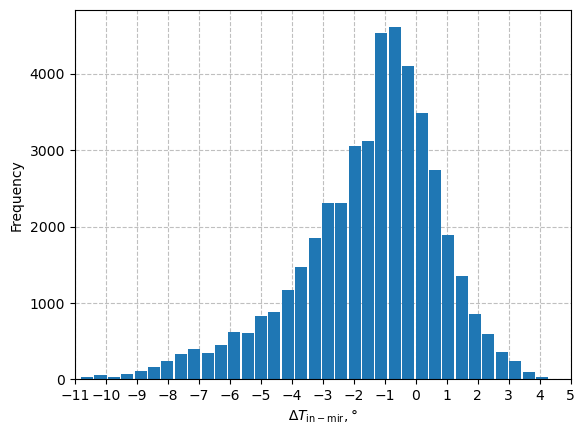

-1.5113539988968558 -1.1 [-3.18  0.28]


In [34]:
all_temp = "D:/astro/domecam/all_temperature.txt"

df_temp = pd.read_csv(all_temp, sep=" ")
df_temp['year'] = df_temp['year'].astype(str) + df_temp['hour'].astype(str)
df_temp['year'] = pd.to_datetime(df_temp['year'], format='%Y-%m-%d%H:%M:%S')

df_temp['differ'].hist(bins=40, grid=False, zorder=2, rwidth=0.9) #ax=ax[i] 
plt.xlabel('$∆T_\mathrm{in-mir}, °$') 
plt.xticks(np.arange(min(df_temp['differ']), max(df_temp['differ'])+1, 1, dtype=int))
plt.ylabel('Frequency') 
plt.grid(alpha=0.8, linestyle='--')
plt.xlim(-11, 5)
plt.savefig('D:/astro/domecam/all_temperature.png', bbox_inches='tight')
plt.show()

print(np.mean(df_temp['differ']), np.median(df_temp['differ']), np.percentile(df_temp['differ'], [20, 80]))

In [35]:
all_temp_less_hour = "D:/astro/domecam/all_temperature2.txt"

df_temp_less_hour = pd.read_csv(all_temp_less_hour, sep=" ")
df_temp_less_hour['year'] = df_temp_less_hour['year'].astype(str) + df_temp_less_hour['hour'].astype(str)
df_temp_less_hour['year'] = pd.to_datetime(df_temp_less_hour['year'], format='%Y-%m-%d%H:%M:%S')
df_temp_less_hour
print(np.mean(df_temp_less_hour['differ']), np.median(df_temp_less_hour['differ']), np.percentile(df_temp_less_hour['differ'], [20, 80]))

-1.8965223274695537 -1.5 [-3.77  0.2 ]


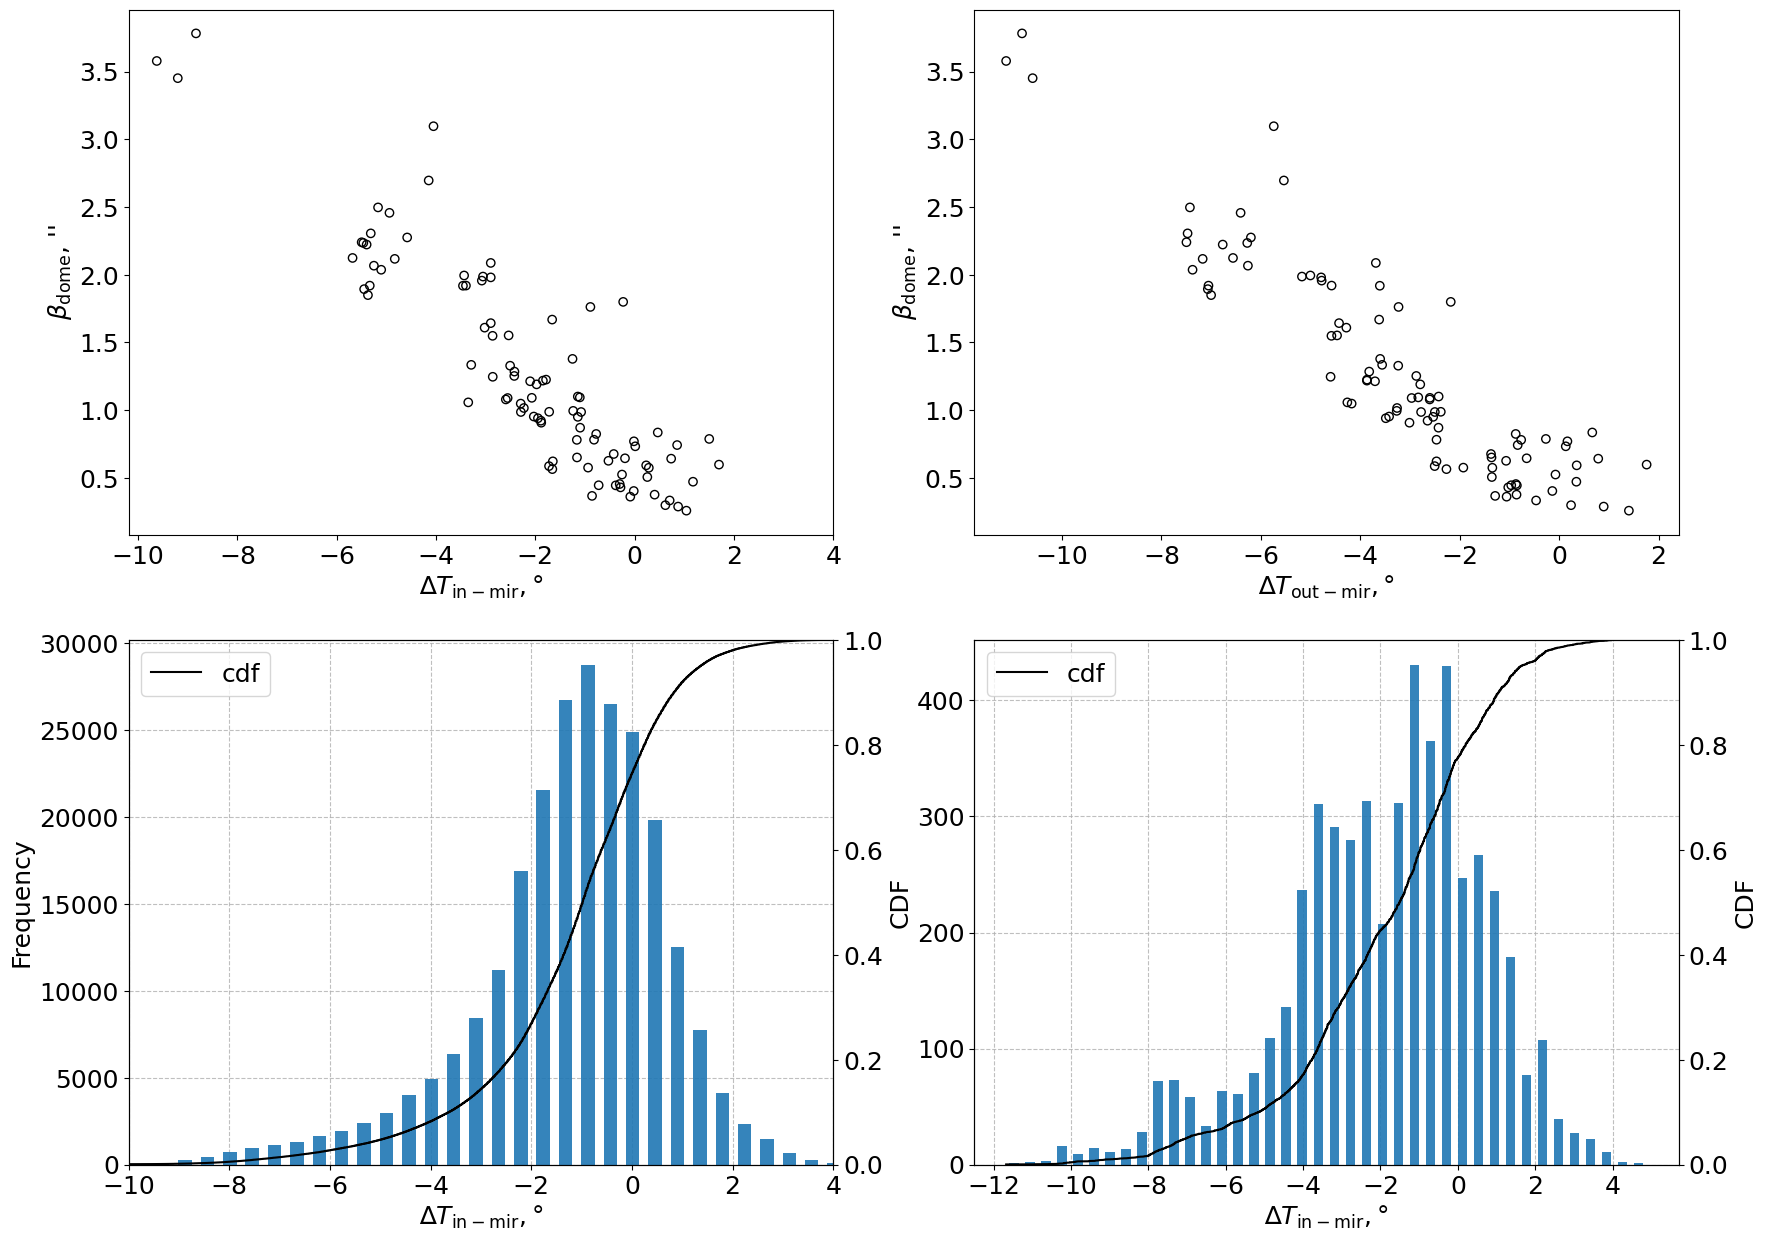

In [92]:
mirror_temperature = (df['ts_1'] + df['ts_2'] + df['ts_3'])/3
indoor_temperuature = (df['ts_17'] + df['ts_19'])/2
outdoor_temperuature = df['temperature']

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

ax.scatter(indoor_temperuature - mirror_temperature, df['seeing'], edgecolor='black', color="None", alpha=1)
ax.set_ylabel(seeing_label, size=font_size)
ax.set_xlabel("$∆T_\mathrm{in-mir}, °$", size=font_size)
ax.set_xticks(np.arange(-10, 6, 2, dtype=int))
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

ax2.scatter(outdoor_temperuature - mirror_temperature, df['seeing'], edgecolor='black', color="None", alpha=1)
ax2.set_ylabel(seeing_label, size=font_size)
ax2.set_xlabel("$∆T_\mathrm{out-mir}, °$", size=font_size)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)

df_temp['differ'].hist(bins=40, grid=False, zorder=2, rwidth=0.6, ax=ax3, alpha=0.9)
ax3.set_xlabel('$∆T_\mathrm{in-mir}, °$', size=18) 
# ax3.set_xticks(np.arange(min(df_temp['differ']), max(df_temp['differ'])+1, 1, dtype=int))
ax3.set_xticks(np.arange(-10, 6, 2, dtype=int))
ax3.set_ylabel('Frequency', size=18) 
ax3.grid(alpha=0.8, linestyle='--')
ax3.tick_params(labelsize=18)
ax3.set_xlim(-10, 4)

count, bins_count = np.histogram(df_temp['differ'], bins=len(df_temp['differ']))
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 

ax3_2 = ax3.twinx()
ax3_2.plot(bins_count[1:], cdf, color='black', label='cdf') 
ax3_2.set_ylabel("CDF", size=18)
ax3_2.tick_params(labelsize=18)
ax3_2.legend(fontsize=18)
ax3_2.set_ylim(0, 1)

#---
df_temp_less_hour['differ'].hist(bins=40, grid=False, zorder=2, rwidth=0.6, ax=ax4, alpha=0.9)
ax4.set_xlabel('$∆T_\mathrm{in-mir}, °$', size=18) 
ax4.set_xticks(np.arange(-12, 6, 2, dtype=int))
ax4.grid(alpha=0.8, linestyle='--')
ax4.tick_params(labelsize=18)
# ax4.set_xlim(-10, 4)

count2, bins_count2 = np.histogram(df_temp_less_hour['differ'], bins=len(df_temp_less_hour['differ']))
pdf2 = count2 / sum(count2) 
cdf2 = np.cumsum(pdf2) 

ax4_2 = ax4.twinx()
ax4_2.plot(bins_count2[1:], cdf2, color='black', label='cdf') 
ax4_2.set_ylabel("CDF", size=18)
ax4_2.tick_params(labelsize=18)
ax4_2.legend(fontsize=18)
ax4_2.set_ylim(0, 1)

fig.savefig('D:/astro/domecam/all_all_temperature.png', bbox_inches='tight')

In [22]:
df = pd.read_csv("D:/astro/logs_open_close.csv", index_col=0)
df['open'] = pd.to_datetime(df['open'], format='%Y-%m-%d %H:%M:%S')
df['close_open'] = df['close_open'].str.replace('days', '')
df['close_open'] = df['close_open'].str[3:5].astype(int)

df2 = df.loc[df['close_open'] < 1 ]
df2 = df2.drop(columns=['close_open'])

df3 = df.loc[df['close_open'] >= 1 ]
df3 = df3.assign(open_plus_hour=df['open'] + timedelta(hours=1))
df3 = df3.drop(columns=['close'])
df3 = df3.rename(columns={"open_plus_hour": "close"})
df3 = df3.drop(columns=['close_open'])
# df3.to_csv("logs_open_close3.csv")

result = pd.concat([df2, df3])
result.to_csv("logs_open_close_main.csv")

# df['close_open'] = pd.to_datetime(df['close_open'], format='%H:%M:%S')
# df['close_open'] = df['close_open'].dt.time
# df['close_open'] < timedelta(hours=1)